In [1]:
#Importación de librerias
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importación de datos
data = np.loadtxt('din2.txt')

# Recolección de datos. Almacenamos los datos de masa, área y sus incertidumbres en vectores
time = data[:,0]
x = data[:,1]
v = data[1:43,2]
time_v = data[1:43,0]

In [7]:
import pandas as pd

In [13]:
df = pd.DataFrame({'time':time, 'x':x})

print(list(df['x']))
print(list(df['time']))

[-0.0004113617067, 0.0008774359289, 0.002363524329, 0.004897186734, 0.007079793339, 0.01012346283, 0.0141871465, 0.01806431906, 0.02355937862, 0.02907081121, 0.03503194499, 0.04219960407, 0.05016242673, 0.05812524939, 0.06716977704, 0.07524397109, 0.08585008083, 0.0948476923, 0.1061729548, 0.1156784069, 0.1269432324, 0.1387452415, 0.1514234073, 0.1653652863, 0.1782099124, 0.1907905321, 0.2058331462, 0.2195143578, 0.2341152491, 0.2498185622, 0.2653634393, 0.2815276686, 0.2978523572, 0.3160214608, 0.3322922993, 0.349850827, 0.3685340519, 0.3879535963, 0.4073191766, 0.4275094864, 0.4481151377, 0.4710154721, 0.4918531442, 0.5153496681, 0.5388622054, 0.5614612699, 0.5861121554, 0.6104063917, 0.634130315, 0.6624059626]
[0.0, 0.01666666667, 0.03333333333, 0.05, 0.06666666667, 0.08333333333, 0.1, 0.1166666667, 0.1333333333, 0.15, 0.1666666667, 0.1833333333, 0.2, 0.2166666667, 0.2333333333, 0.25, 0.2666666667, 0.2833333333, 0.3, 0.3166666667, 0.3333333333, 0.35, 0.3666666667, 0.3833333333, 0.4,

In [3]:
# Sacando datos de la función de ajuste
time_ajuste = np.linspace(0,time[-1],500)

A=0.8726
B=0.09857
C=-0.003186

A1 = 1.7840
B1 = 0.0817

x_ajuste = A*time_ajuste**2 + B*time_ajuste + C
v_ajuste = A1*time_ajuste + B1*time_ajuste

In [5]:
# Curva teórica
g = 9.8
theta = 30*np.pi/180
u_k = 0.385

time_teoria = np.linspace(0,time[-1],500)
x_teoria = 1/2*g*(np.sin(theta)-u_k*np.cos(theta))*time_teoria**2
v_teoria = g*(np.sin(theta)-u_k*np.cos(theta))*time_teoria

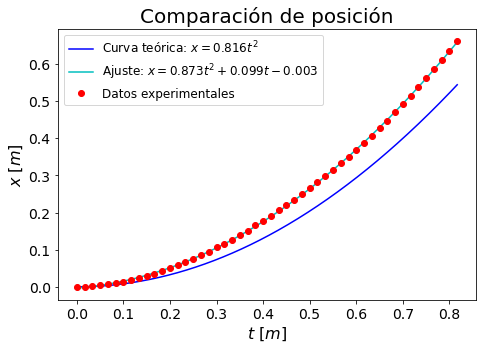

In [6]:
plt.figure(figsize=(7.5, 5))
plt.plot(time_teoria ,x_teoria,'b',label='Curva teórica: $x = %.3ft^2$'%(1/2*g*(np.sin(theta)-u_k*np.cos(theta))))
plt.plot(time_ajuste,x_ajuste,'c',label='Ajuste: $x = %.3ft^2+ %.3ft %.3f$'%(A,B,C))
plt.plot(time,x,'or',label='Datos experimentales')

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Comparación de posición', fontsize = 20)
plt.legend(fontsize = 12, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$x$ [$m$]', fontsize = 16)
plt.xlabel('$t$ [$m$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('grafica_x_din2.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

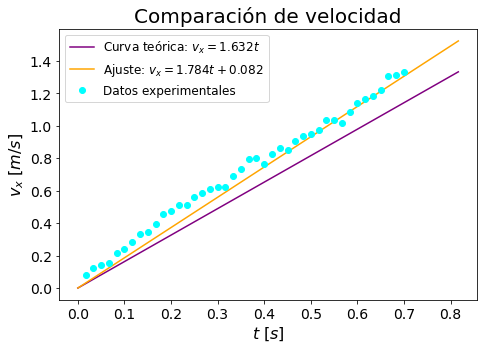

In [7]:
plt.figure(figsize=(7.5, 5))
plt.plot(time_teoria ,v_teoria,'purple',label='Curva teórica: $v_{x} = %.3f t$'%(g*(np.sin(theta)-u_k*np.cos(theta))))
plt.plot(time_ajuste,v_ajuste,'orange',label='Ajuste: $v_{x} = %.3ft+ %.3f$'%(A1,B1))
plt.plot(time_v,v,'o', color='cyan',label='Datos experimentales')

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Comparación de velocidad', fontsize = 20)
plt.legend(fontsize = 12, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$v_{x}$ [$m/s$]', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('grafica_vx_din2.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

In [8]:
# Encontrando la desviación estándar de las diferencias entre el modelo teórico (ecuaciones teóricas) y experimental (ecuaciones de ajuste)

# Se calculan los valores de teoricos 'xt' y 'vt' y los experimentales 'xe' y 've'
xt = 1/2*g*(np.sin(theta)-u_k*np.cos(theta))*time**2
xe = A*time**2 + B*time + C
vt = g*(np.sin(theta)-u_k*np.cos(theta))*time_v
ve = A1*time_v + B1

#Se calculan las diferencias entre los puntos de ambos modelos
dx = (xt-xe)
dv = (vt-ve)

#Se calcula el promedio de las diferencias
N = np.size(xt)
prom = np.sum(dx)/N
N1 = np.size(vt)
prom1 = np.sum(dv)/N


# Se calcula la desviación estándar con el valor 'rms' (media cuadrática) y 'prom' (promedio)
rms = np.sum(dx**2)/N
desviacion = np.sqrt(rms-prom**2)
rms1 = np.sum(dv**2)/N1
desviacion1 = np.sqrt(rms1-prom1**2)


print('desviación x = ', desviacion)
print('desviación vx = ', desviacion1)

desviación x =  0.034899033552053614
desviación vx =  0.07988413892297912


In [9]:
# Calibración del método del cálculo de la desviación para la curva de ajuste y los datos

# Se calculan los valores de x del ajust 'xa' y experimentales 'xe'
xa = A*time**2 + B*time + C
xe = x

#Se calculan las diferencias entre los puntos de ambos modelos
dx = (xa-xe) #Diferencias

#Se calcula el promedio de las diferencias
N = np.size(x)
prom = np.sum(dx)/N

# Se calcula la desviación estándar con el valor 'rms' (media cuadrática) y 'prom' (promedio)
rms = np.sum(dx**2)/N
desviacion = np.sqrt(rms-prom**2)

# Desviación reportada por Tracker
desviación_tracker = 0.001490

print('Desviación\n')
print('jupyter = ', desviacion)
print('tracker = ', desviación_tracker)

Desviación

jupyter =  0.0014903365695432753
tracker =  0.00149
